Here is the starting of Part 2 of our Data Science project 1.data Collection and Sentence Segmentation. We are here trying to collect text data using URL and compare with different python libraries like spacy,stanza and nltk.

In [2]:
!pip install spacy
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=fab998fb459c87a72231c325987da548a36fe9174a8a4936becb4a4a0e955dcd
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [23]:
#using Spacy and Stanza 

In [16]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import spacy
import stanza

# Download the Spacy English model
spacy.load('en_core_web_sm')

# Download the Stanza English model
stanza.download('en')

# Load the Spacy English model
spacy_nlp = spacy.load('en_core_web_sm')

# Load the Stanza English model
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize')

def create_text_dataset(src, n):
    if src.startswith('http'):
        response = requests.get(src)
        soup = BeautifulSoup(response.content, 'html.parser')
        text = soup.get_text()
    else:
        with open(src, 'r') as f:
            text = f.read()


 # Use Spacy to split sentences and extract only the main content
    doc = spacy_nlp(text)
    main_content = []
    for chunk in doc.noun_chunks:
        if chunk.root.dep_ == 'nsubj' and chunk.root.head.pos_ == 'VERB':
            sentence = chunk.sent
            main_content.append(sentence.text)

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

    # Filter out any empty strings or strings containing only whitespace
    sentences = [s.strip() for s in sentences if s.strip()]

    if n > len(sentences):
        raise ValueError("Dataset size exceeds the number of available sentences.")

    # Use Spacy to split sentences
    spacy_sentences = [sent.text for sent in spacy_nlp(text).sents]
    spacy_sentences = [re.sub(r'[\n^]', ' ', sent) for sent in spacy_sentences]


    # Use Stanza to split sentences
    stanza_sentences = [sent.text for sent in stanza_nlp(text).sentences]
    stanza_sentences = [re.sub(r'[\n^]', ' ', sent) for sent in stanza_sentences]

    # Create a dataframe with the sentences
    df = pd.DataFrame({'original': sentences[:n], 'spacy': spacy_sentences[:n], 'stanza': stanza_sentences[:n]})

    return df

def get_shared_sentences(df):
    # Get the set of sentences recognized by both Spacy and Stanza
    spacy_set = set(df['spacy'])
    stanza_set = set(df['stanza'])
    shared_set = spacy_set.intersection(stanza_set)

    # Create a dataframe with the shared sentences
    shared_df = pd.DataFrame({'sentence': list(shared_set)})

    return shared_df

# with url
src = "https://en.wikipedia.org/wiki/List_of_female_scientists_in_the_20th_century"
n = 100
dataset = create_text_dataset(src, n)

# Compute and output the number of sentences produced by Spacy and Stanza
num_spacy_sentences = len(dataset['spacy'])
num_stanza_sentences = len(dataset['stanza'])
print(f"Number of sentences produced by Spacy: {num_spacy_sentences}")
print(f"Number of sentences produced by Stanza: {num_stanza_sentences}")

# Output the set of sentences recognized by both libraries
shared_df = get_shared_sentences(dataset)
shared_df.to_csv('shared_sentences.csv', index=False)
print(f"Number of shared sentences: {len(shared_df)}")
print(shared_df.head())


INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Done loading processors!


Number of sentences produced by Spacy: 100
Number of sentences produced by Stanza: 100
Number of shared sentences: 2
                                            sentence
0  During this time period, women working in scie...
1  This is a historical list dealing with women s...


In [17]:
print(shared_df)


                                            sentence
0  During this time period, women working in scie...
1  This is a historical list dealing with women s...


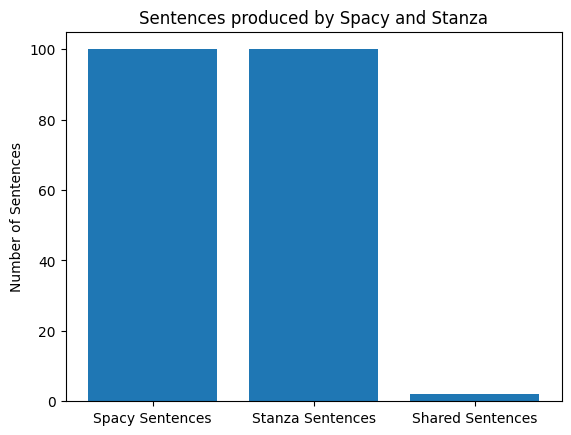

In [18]:
import matplotlib.pyplot as plt

# Define the data for the graph
labels = ['Spacy Sentences', 'Stanza Sentences', 'Shared Sentences']
values = [num_spacy_sentences, num_stanza_sentences, len(shared_df)]

# Create the bar graph
plt.bar(labels, values)

# Add labels to the graph
plt.title('Sentences produced by Spacy and Stanza')
plt.ylabel('Number of Sentences')

# Show the graph
plt.show()


In [22]:
#using two libraries Spacy and NLTK

In [19]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import spacy
import nltk

# Download the Spacy English model
spacy.load('en_core_web_sm')

# Download the NLTK punkt tokenizer
nltk.download('punkt')

# Load the Spacy English model
spacy_nlp = spacy.load('en_core_web_sm')

#check if the source in a url or a local file

def create_text_dataset(src, n):
    if src.startswith('http'):
        response = requests.get(src)
        soup = BeautifulSoup(response.content, 'html.parser')
        text = soup.get_text()
    else:
        with open(src, 'r') as f:
            text = f.read()

    # Use Spacy to split sentences and extract only the main content
    doc = spacy_nlp(text)
    main_content = []
    for chunk in doc.noun_chunks:
        if chunk.root.dep_ == 'nsubj' and chunk.root.head.pos_ == 'VERB':
            sentence = chunk.sent
            main_content.append(sentence.text)
#use nltk to split the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Filter out any empty strings or strings containing only whitespace
    sentences = [s.strip() for s in sentences if s.strip()]

    if n > len(sentences):
        raise ValueError("Dataset size exceeds the number of available sentences.")

    # Use Spacy to split sentences
    spacy_sentences = [sent.text for sent in spacy_nlp(text).sents]
    spacy_sentences = [re.sub(r'[\n^]', ' ', sent) for sent in spacy_sentences]

    # Create a dataframe with the sentences
    df = pd.DataFrame({'original': sentences[:n], 'spacy': spacy_sentences[:n]})

    return df

def get_shared_sentences(df):
    # Get the set of sentences recognized by both Spacy and NLTK
    spacy_set = set(df['spacy'])
    nltk_set = set(df['original'])
    shared_set = spacy_set.intersection(nltk_set)

    # Create a dataframe with the shared sentences
    shared_df = pd.DataFrame({'sentence': list(shared_set)})

    return shared_df
#result
# with url
src = "https://en.wikipedia.org/wiki/List_of_female_scientists_in_the_20th_century"
n = 100
dataset = create_text_dataset(src, n)

# Compute and output the number of sentences produced by Spacy and NLTK
num_spacy_sentences = len(dataset['spacy'])
num_nltk_sentences = len(dataset['original'])
print(f"Number of sentences produced by Spacy: {num_spacy_sentences}")
print(f"Number of sentences produced by NLTK: {num_nltk_sentences}")

# Output the set of sentences recognized by both libraries
shared_df = get_shared_sentences(dataset)
shared_df.to_csv('shared_sentences.csv', index=False)
print(f"Number of shared sentences: {len(shared_df)}")
print(shared_df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of sentences produced by Spacy: 100
Number of sentences produced by NLTK: 100
Number of shared sentences: 16
                                            sentence
0  During this time period, women working in scie...
1                       IEEE Global History Network.
2                     American Mathematical Society.
3                                    iwonderweather.
4                                              2012.


In [20]:
print(shared_df)

                                             sentence
0   During this time period, women working in scie...
1                        IEEE Global History Network.
2                      American Mathematical Society.
3                                     iwonderweather.
4                                               2012.
5        Archived from the original on 6 August 2013.
6      Archived from the original on 17 October 2016.
7      Archived from the original on 16 October 2014.
8   Change Is Possible: Stories of Women And Minor...
9        Archived from the original on 24 April 2013.
10     Archived from the original on 11 October 2020.
11                           Daejon Ilbo (in Korean).
12                                              IEEE.
13                                           Daejeon.
14                                             p. 47.
15                            ISBN 978-0-8218-3748-1.


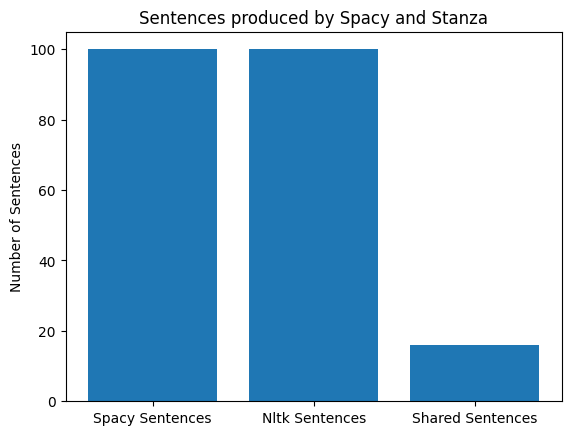

In [21]:
import matplotlib.pyplot as plt

# Define the data for the graph
labels = ['Spacy Sentences', 'Nltk Sentences', 'Shared Sentences']
values = [num_spacy_sentences, num_nltk_sentences, len(shared_df)]

# Create the bar graph
plt.bar(labels, values)

# Add labels to the graph
plt.title('Sentences produced by Spacy and Stanza')
plt.ylabel('Number of Sentences')

# Show the graph
plt.show()